In [72]:
# Import Dependencies
import pandas as pd
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [73]:
# Create reference to CSV file
csv_path = Path("Resources/pd_collisions_details_datasd.csv")
csv_path2 = Path("Resources/traffic_counts_datasd.csv")

# Read into df's
df = pd.read_csv(csv_path, low_memory=False)
df_traffic = pd.read_csv(csv_path2, low_memory=False)


In [74]:
# drop columns that won't be used 
df.drop(columns=['person_role', 'person_veh_type', 'veh_type', 'hit_run_lvl', 'veh_make', 'veh_model', 'police_beat', 'address_pd_intersecting',\
                  'address_name_intersecting', 'address_sfx_intersecting', 'violation_section', 'violation_type'], inplace=True)
# check the new df
df.head()

,report_id,date_time,person_injury_lvl,address_no_primary,address_pd_primary,address_road_primary,address_sfx_primary,charge_desc,injured,killed
0,171111,2015-01-14 20:00:00,NaN,4200.0,,JUNIPER,STREET,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0.0,0.0
1,192016,2015-03-19 12:00:00,NaN,5200.0,,LINDA VISTA,ROAD,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0.0,0.0
2,190012,2015-03-24 03:05:00,VISABLE,1000.0,W,WASHINGTON,STREET,TURNING MOVEMENTS AND REQUIRED SIGNALS,2.0,0.0
3,191866,2015-03-27 23:56:00,PAIN,2800.0,,WORDEN,STREET,TURNING MOVEMENTS AND REQUIRED SIGNALS,1.0,0.0
4,185207,2015-07-06 11:45:00,NaN,2800.0,,EL CAJON,BOULEVARD,HIT AND RUN,0.0,0.0


In [75]:
#drop columns to see only the total traffic counts
df_traffic.drop(columns=['westbound_count', 'southbound_count', 'eastbound_count', 'northbound_count', 'file_no'], inplace=True)
df_traffic.head()

,id,street_name,limits,total_count,date_count
0,01AV018207,01 AV,A ST - ASH ST,18010,2007-03-13 00:00:00
1,01AV015210,01 AV,A ST - ASH ST,20060,2010-03-18 00:00:00
2,01AV018213,01 AV,A ST - ASH ST,19597,2013-03-12 00:00:00
3,01AV007721,01 AV,A ST - ASH ST,10640,2021-03-10 00:00:00
4,01AV088812,01 AV,ASH ST - BEECH ST,2298,2012-12-11 00:00:00


In [76]:
df_traffic['date_count'] = pd.to_datetime(df_traffic['date_count'], format='%Y-%m-%d %H:%M:%S')
df_traffic.dtypes

id                     object
street_name            object
limits                 object
total_count             int64
date_count     datetime64[ns]
dtype: object

In [77]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')
df.dtypes

report_id                       object
date_time               datetime64[ns]
person_injury_lvl               object
address_no_primary             float64
address_pd_primary              object
address_road_primary            object
address_sfx_primary             object
charge_desc                     object
injured                        float64
killed                         float64
dtype: object

In [78]:
#rename date column in traffic df and collisions df
df_traffic.rename(columns={'date_count': 'date'}, inplace=True)

df.rename(columns={'date_time': 'date'}, inplace=True)

C:\Users\aliac\AppData\Local\Temp\ipykernel_10964\2541701883.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury_df['Year'] = injury_df['date'].dt.year


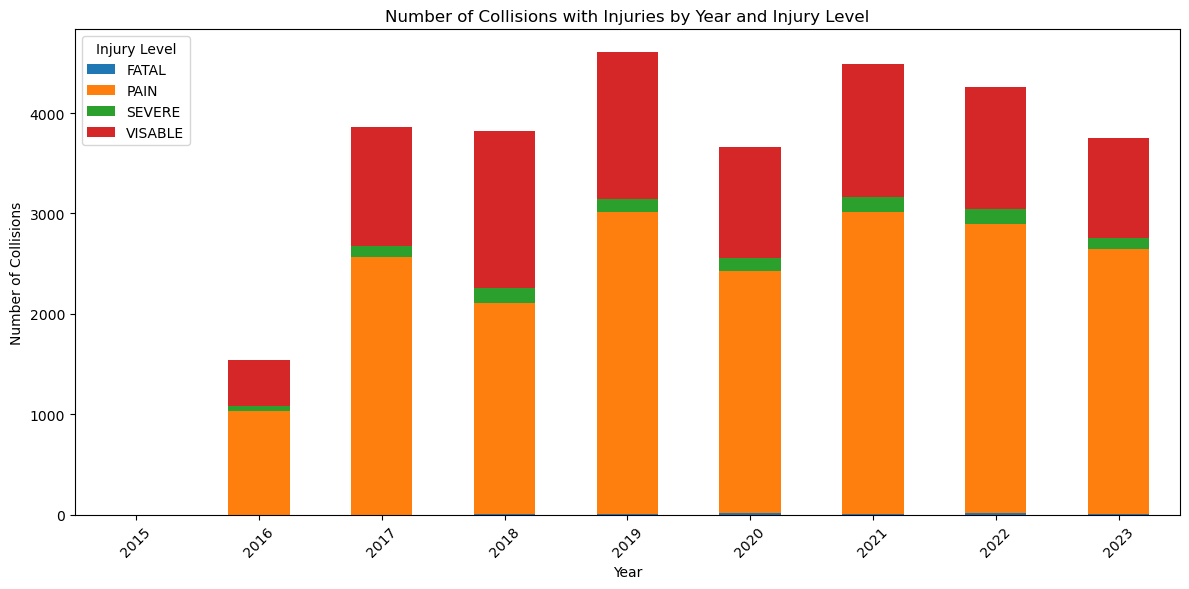

In [79]:
# Filter rows with injuries
injury_df = df[df['injured'] > 0]

# Extract year from the 'Date' column
injury_df['Year'] = injury_df['date'].dt.year

# Group by year and injury level
grouped_data = injury_df.groupby(['Year', 'person_injury_lvl']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax)
plt.title('Number of Collisions with Injuries by Year and Injury Level')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.legend(title='Injury Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [80]:
# df['charge_desc'].unique()


In [81]:
df['charge_desc'].value_counts()


charge_desc
MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHICLE CODE             17982
TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)                        16355
TURNING MOVEMENTS AND REQUIRED SIGNALS                             11582
UNSAFE SPEED (BASIC SPEED LAW) (I)                                 10836
VIOLATION OF BASIC SPEED LAW, SPEED UNSAFE FOR CONDITIONS           5809
                                                                   ...  
PEDESTRIAN ON FREEWAY                                                  1
BICYCLIST MUST OBEY RULES OF THE ROAD (I)                              1
CARRYING WHITE CANE BY OTHER THAN BLIND PERSON                         1
LEAVE MOTORIZED SCOOTER ON SIDEWALK BLOCKING PEDESTRIAN TRAFFIC        1
VEH EXCEED FRAME HEIGHTS (M)                                           1
Name: count, Length: 435, dtype: int64

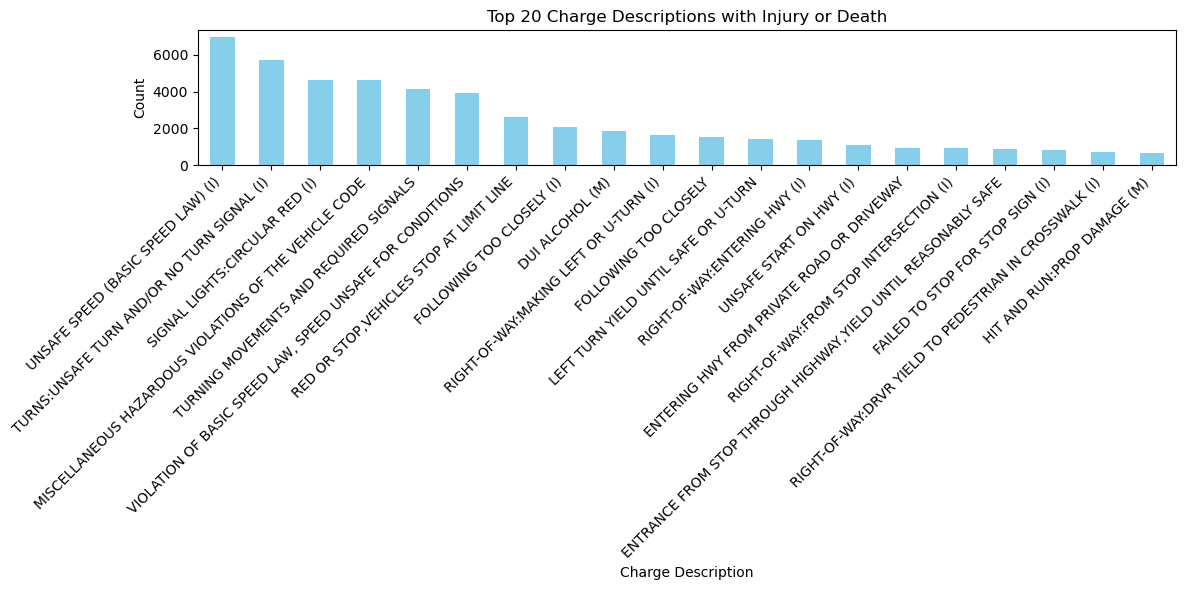

In [82]:
filtered_df = df[(df['injured'] > 0.0) | (df['killed'] > 0.0)]

charge_desc_counts = filtered_df['charge_desc'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
charge_desc_counts[:20].plot(kind='bar', color='skyblue')
plt.title('Top 20 Charge Descriptions with Injury or Death')
plt.xlabel('Charge Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [83]:
# # Select the columns
# new_df = df[['date', 'injured', 'killed', 'person_injury_lvl']].copy()

# # Keep only rows with injuries
# new_df = new_df[new_df['injured'] > 0]

# # Reset the index if needed
# new_df.reset_index(drop=True, inplace=True)

# # Display the new DataFrame
# print(new_df.head())


In [84]:
print(df_traffic.columns)


Index(['id', 'street_name', 'limits', 'total_count', 'date'], dtype='object')


In [85]:
# #Remove data for dates before 2016
# new_df['date'] = pd.to_datetime(new_df['date'])
# df_traffic['date'] = pd.to_datetime(df_traffic['date'])

df['date'] = pd.to_datetime(df['date'])
df_traffic['date'] = pd.to_datetime(df_traffic['date'])

# Filter the DataFrame to keep only rows where the 'date' is later than 2016-01-01
# new_df = new_df[new_df['date'] > '2016-01-01']
df = df[df['date'] > '2016-01-01']

df_traffic = df_traffic[df_traffic['date'] > '2016-01-01']


In [86]:
# Sort the DataFrame by the 'date' column
df_traffic = df_traffic.sort_values(by='date')
df = df.sort_values(by='date')


In [87]:
# #Create a new final DataFrame
# traffic_tot = df_traffic[['total_count', 'date']].copy()

# # Display the result DataFrame
# print(traffic_tot.head())

In [88]:
df.to_csv('D:\DATA_PROJECTS\SD_CAR_CRASH\sd_crashes\CLEAN_pd_collision_df.csv')
df_traffic.to_csv('D:\DATA_PROJECTS\SD_CAR_CRASH\sd_crashes\CLEAN_street_traffic_totals.csv')